In [1]:
# Other machine learning methods

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib


In [2]:
x = pd.read_table('/Users/marong/Dropbox/lakeFrontal_norm_counts_all.txt', sep= '\t').iloc[:,1:]
y = pd.read_table('/Users/marong/Dropbox/lakeFrontal_celltypes.txt', sep= '\t')['Celltype']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [22]:
np.random.seed(777)
rand_index = np.random.permutation(len(y_index))

x_data = x.iloc[(rand_index),:].values
y_data = [y[i] for i in rand_index]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=66)

print(X_train.shape)
print(len(y_train))
print(X_test.shape)
print(len(y_test))

(6438, 21749)
6438
(1610, 21749)
1610


In [62]:
# SVM
model = OneVsOneClassifier(LinearSVC(random_state = 0)).fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict, normalize=True) )
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_predict, average='weighted'))

0.9571428571428572
(0.9517188502376962, 0.9571428571428572, 0.9533654005615858, None)


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


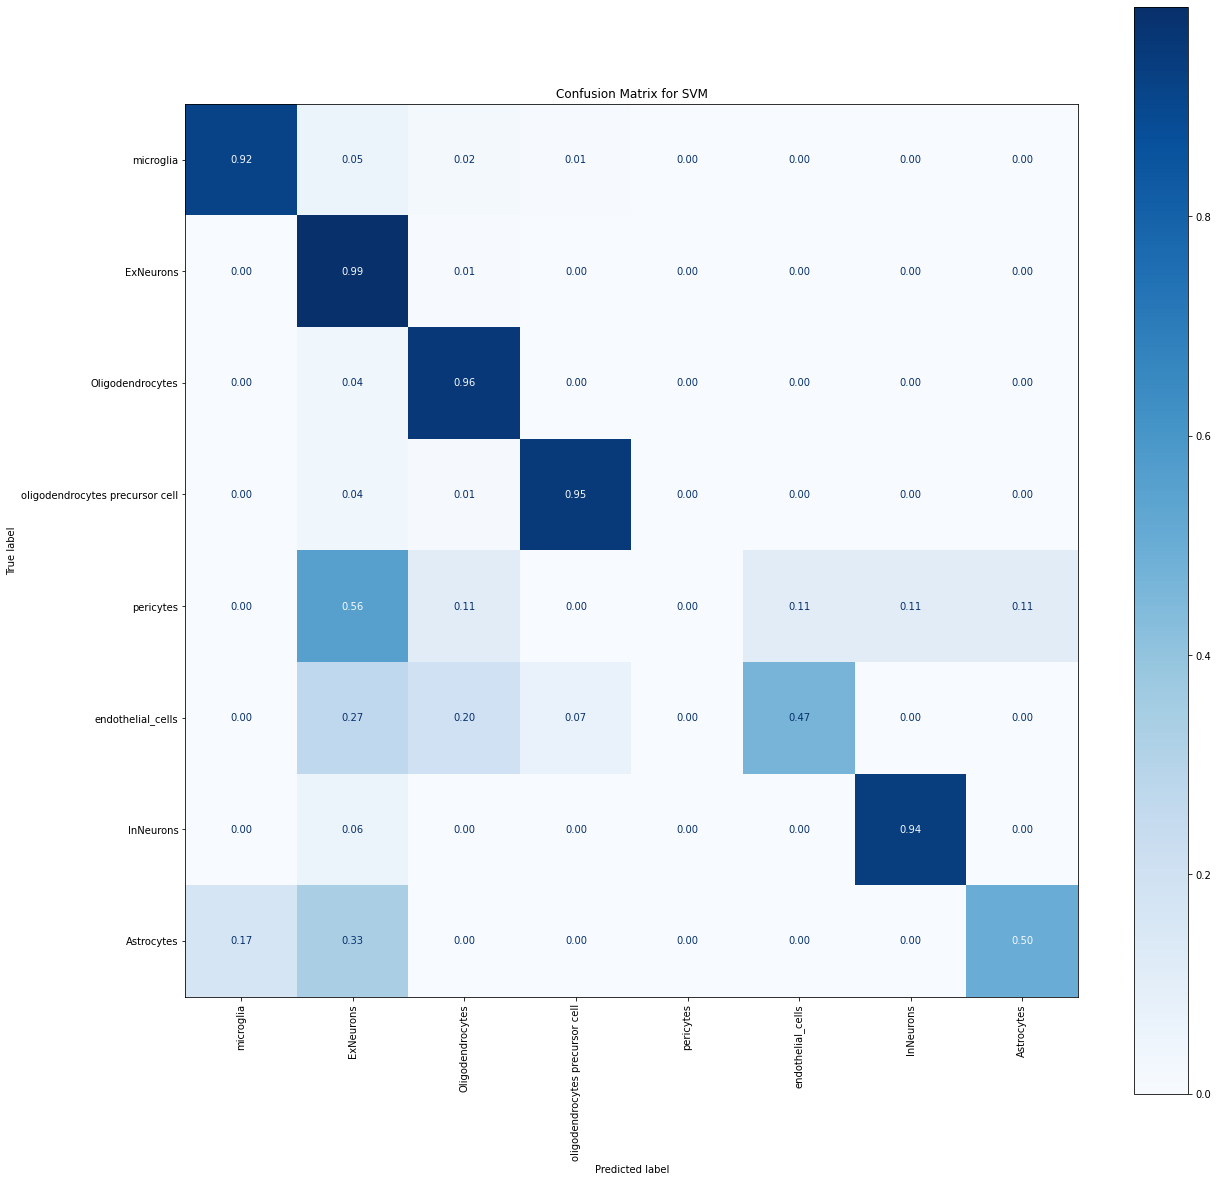

In [54]:
title = 'Confusion Matrix for SVM'


disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation = 'vertical',
                                values_format='.2f')
                    
    
disp.ax_.set_title(title)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
fig.savefig('SVM_brain', dpi = 600)

In [63]:
# Decision Tree for classification
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predict = decision_tree_model.predict(X_test)
print(accuracy_score(y_test, decision_tree_predict,normalize=True))
print(precision_recall_fscore_support(y_test, decision_tree_predict, average='weighted'))

0.8503105590062112
(0.8521380494409554, 0.8503105590062112, 0.850004039121728, None)


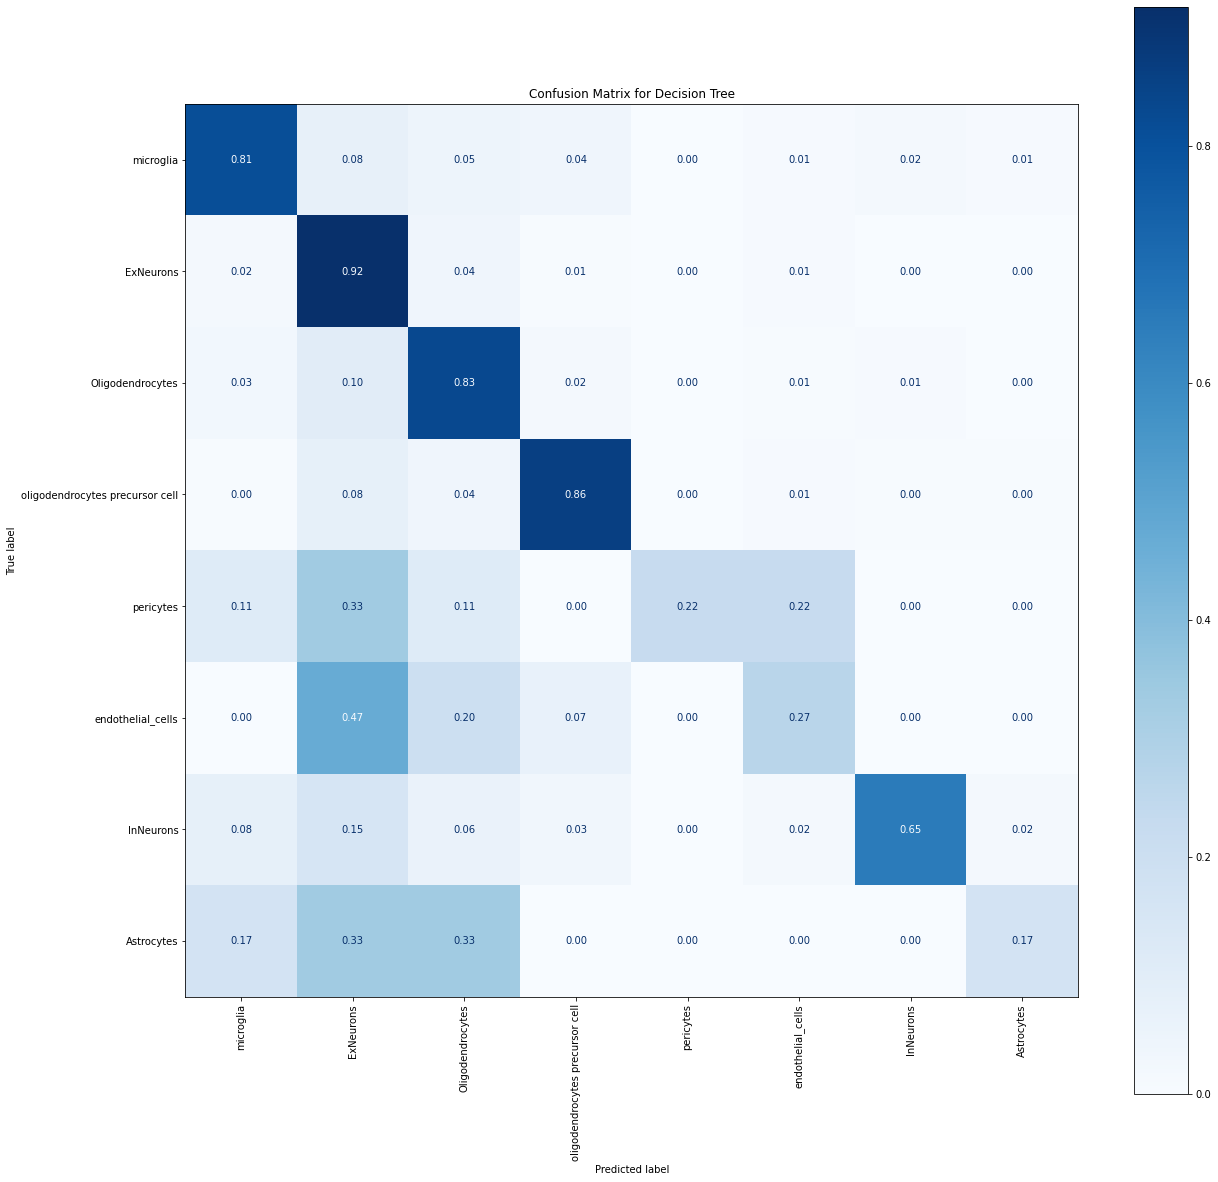

In [53]:
title = 'Confusion Matrix for Decision Tree'

disp_2 = plot_confusion_matrix(decision_tree_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation = 'vertical',
                                values_format='.2f')
disp_2.ax_.set_title(title)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
fig.savefig('Decision_tree_brain', dpi = 600)

In [64]:
# KNN for classification
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)
neigh_y_predict = neigh.predict(X_test)
print(accuracy_score(y_test, neigh_y_predict, normalize=True))
print(precision_recall_fscore_support(y_test, neigh_y_predict, average='weighted'))

0.8217391304347826
(0.8426516962307385, 0.8217391304347826, 0.8020733482937626, None)


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


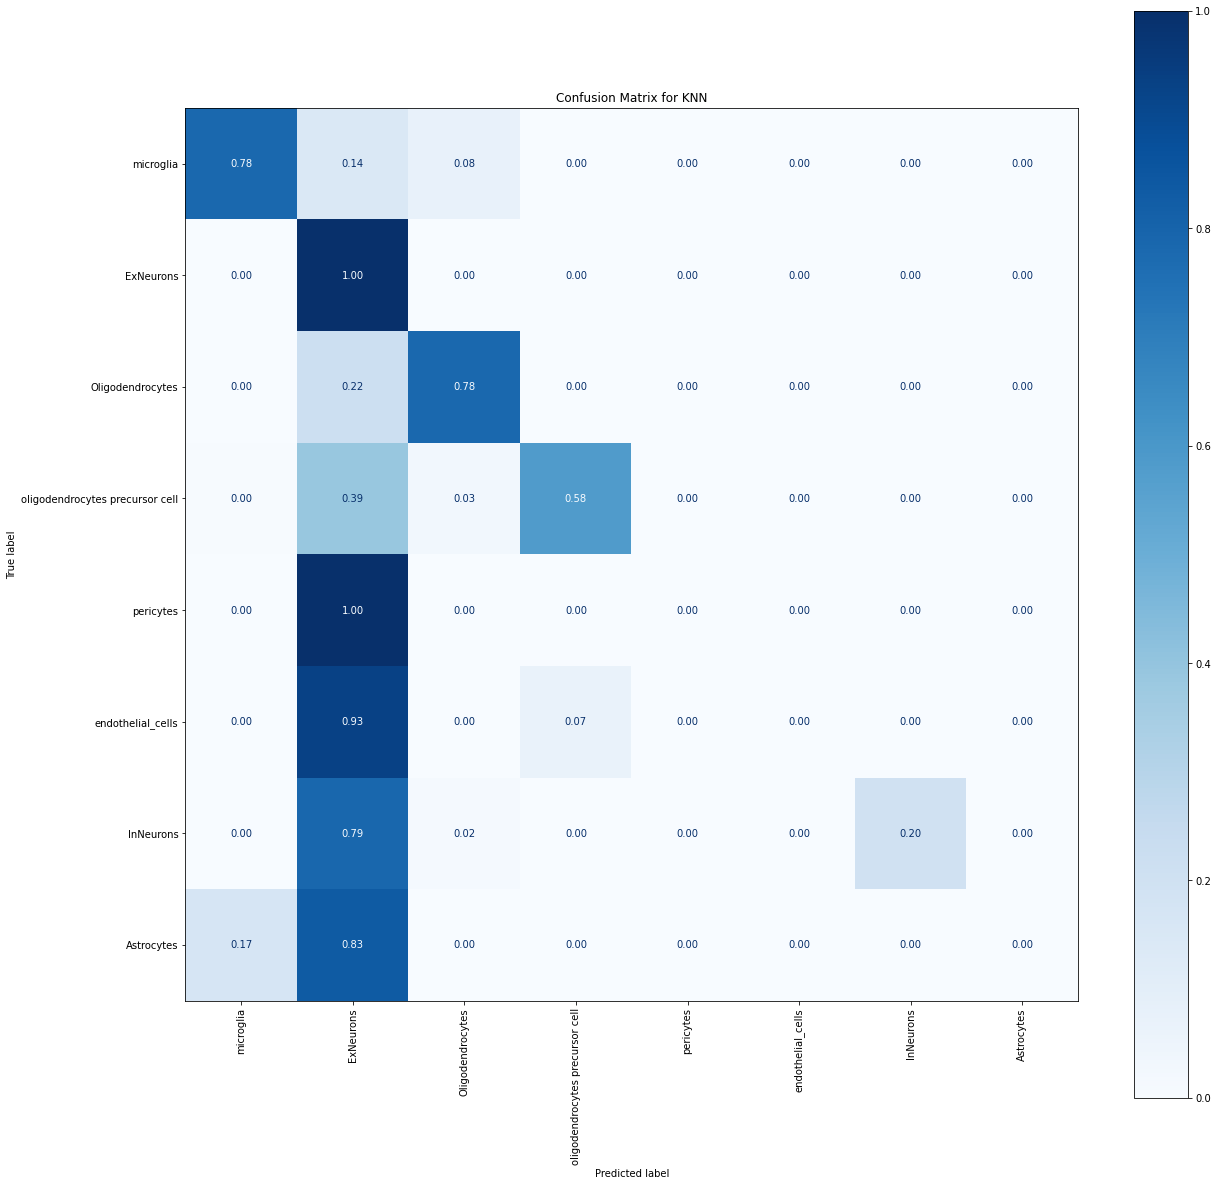

In [59]:
title = 'Confusion Matrix for KNN'

disp_3 = plot_confusion_matrix(neigh, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 xticks_rotation = 'vertical',
                                values_format='.2f')

disp_3.ax_.set_title(title)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
fig.savefig('KNN_brain', dpi = 600)